In [1]:
import numpy as np
from numpy import linalg

################################################################################
# Function: idempotents                                                        #
#                                                                              #
# Purpose: find principal idempotents of a Hermitian matrix                    #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#                                                                              #
# Returns: principal idempotents, eigenvalues                                  #
#                                                                              #
################################################################################

def idempotents(A):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    # Extracts eigenvalues and eigenvectors
    W,V = linalg.eigh(A)
    # Converts eigenvectors into orthonormal basis
    Q, R = linalg.qr(V) 
    Q = matrix(Q)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    idems = []
    evals = []
    i = 0
    j = 0
    while i < n:
        # Zero matrix
        E = matrix(n, n, 0)
        # Checks if eigenvectors share an eigenvalue
        while j < n and abs(W[i] - W[j]) < 0.01:
            # Converts eigenvector into column vecror
            v = Q.column(j).column()
            # updates idempotent
            E = E + v*v.conjugate_transpose();
            j = j + 1
        E = E
        idems.append(E)
        evals.append(W[i].round(3))
        i = j
    return idems, evals

In [40]:
################################################################################
# Function: transfer                                                           #
#                                                                              #
# Purpose: return transfer matrix U(t) given adjacency matrix/Hamiltonian      #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   t        float                              time                           #
#   k        integer                            rounding accuracy              #
#                                                                              #
# Returns: transfer U(t)                                                       #
#                                                                              #
################################################################################

def transfer(A, t):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    idems, evals = idempotents(A)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    U = matrix(n, n, 0)
    for i in range(len(idems)):
        U = U + exp(I*t*evals[i])*idems[i]
    return U      

In [67]:
# Example usages
AC6 = matrix([[0,0,1,0,0,1],[0,0,0,1,1,0],[1,0,0,0,1,0],[0,1,0,0,0,1],[0,1,1,0,0,0],[1,0,0,1,0,0]])
idempotents(AC6)

([
[ 0.16666666666666677 -0.16666666666666666 -0.16666666666666674  0.16666666666666663  0.16666666666666663 -0.16666666666666677]  [  0.3333333333333329  0.33333333333333326  -0.1666666666666664 -0.16666666666666666 -0.16666666666666666  -0.1666666666666665]  [  0.3333333333333335 -0.33333333333333315  0.16666666666666688  -0.1666666666666667 -0.16666666666666657  0.16666666666666682]  [ 0.1666666666666664 0.16666666666666663  0.1666666666666664 0.16666666666666657 0.16666666666666666 0.16666666666666652]
[-0.16666666666666666  0.16666666666666652  0.16666666666666663 -0.16666666666666652 -0.16666666666666652  0.16666666666666666]  [ 0.33333333333333326   0.3333333333333336 -0.16666666666666652  -0.1666666666666668 -0.16666666666666685 -0.16666666666666669]  [-0.33333333333333315  0.33333333333333287 -0.16666666666666669   0.1666666666666665   0.1666666666666665  -0.1666666666666667]  [0.16666666666666663 0.16666666666666685 0.16666666666666666  0.1666666666666668 0.16666666666666688 

In [42]:
transfer(AC6,np.pi)

[   -0.33333333333333326 + 1.5407439555097887e-31*I -1.1102230246251565e-16 - 1.6328623988631373e-16*I  -8.049116928532385e-16 - 4.0821559971578395e-17*I                                 0.6666666666666665                                 0.6666666666666665  -5.828670879282072e-16 - 4.0821559971578426e-17*I]
[-1.1102230246251565e-16 - 1.6328623988631373e-16*I     -0.3333333333333331 - 1.7256332301709633e-31*I       0.6666666666666665 - 2.465190328815662e-32*I    5.828670879282072e-16 - 4.082155997157844e-17*I   7.216449660063518e-16 - 4.0821559971578457e-17*I       0.6666666666666669 - 2.465190328815662e-32*I]
[ -8.049116928532385e-16 - 4.0821559971578395e-17*I       0.6666666666666665 - 2.465190328815662e-32*I     -0.3333333333333336 + 1.1709654061874394e-31*I   8.326672684688674e-17 - 1.6328623988631373e-16*I  -2.7755575615628914e-17 - 4.082155997157842e-17*I       0.6666666666666665 + 7.395570986446986e-32*I]
[                                0.6666666666666665    5.828670879282072e-16

In [43]:
AC5 = matrix([[0,1,0,0,1],[1,0,1,0,0],[0,1,0,1,0],[0,0,1,0,1],[1,0,0,1,0]]);

In [44]:
transfer(AC6,np.pi)

[   -0.33333333333333326 + 1.5407439555097887e-31*I -1.1102230246251565e-16 - 1.6328623988631373e-16*I  -8.049116928532385e-16 - 4.0821559971578395e-17*I                                 0.6666666666666665                                 0.6666666666666665  -5.828670879282072e-16 - 4.0821559971578426e-17*I]
[-1.1102230246251565e-16 - 1.6328623988631373e-16*I     -0.3333333333333331 - 1.7256332301709633e-31*I       0.6666666666666665 - 2.465190328815662e-32*I    5.828670879282072e-16 - 4.082155997157844e-17*I   7.216449660063518e-16 - 4.0821559971578457e-17*I       0.6666666666666669 - 2.465190328815662e-32*I]
[ -8.049116928532385e-16 - 4.0821559971578395e-17*I       0.6666666666666665 - 2.465190328815662e-32*I     -0.3333333333333336 + 1.1709654061874394e-31*I   8.326672684688674e-17 - 1.6328623988631373e-16*I  -2.7755575615628914e-17 - 4.082155997157842e-17*I       0.6666666666666665 + 7.395570986446986e-32*I]
[                                0.6666666666666665    5.828670879282072e-16

In [45]:
AC4 = matrix([[0, 0, 1, 1],[0, 0, 1, 1],[1, 1, 0, 0],[1, 1, 0, 0]]); AC4

[0 0 1 1]
[0 0 1 1]
[1 1 0 0]
[1 1 0 0]

In [46]:
idempotents(AC4)

([
[                0.25  0.25000000000000006                -0.25 -0.24999999999999994]  [     0.4999999999999999     -0.4999999999999999  -9.813077866773593e-18  -9.813077866773587e-18]  [ 0.2499999999999999  0.2499999999999999                0.25 0.24999999999999994]
[ 0.25000000000000006   0.2500000000000001 -0.25000000000000006                -0.25]  [    -0.4999999999999999      0.4999999999999999  4.6820512020945476e-17 -2.7194356287398302e-17]  [ 0.2499999999999999  0.2499999999999999                0.25 0.24999999999999994]
[               -0.25 -0.25000000000000006                 0.25  0.24999999999999994]  [ -9.813077866773593e-18  4.6820512020945476e-17      0.4999999999999999                    -0.5]  [               0.25                0.25  0.2500000000000001 0.25000000000000006]
[-0.24999999999999994                -0.25  0.24999999999999994   0.2499999999999999], [ -9.813077866773587e-18 -2.7194356287398302e-17                    -0.5      0.5000000000000001], [0.2499

In [47]:
H = np.matrix([[0,1j],[-1j,0]])

In [48]:
res1, res2 = idempotents(H); [res.round(5) for res in res1]

[
[   0.5 -0.5*I]  [   0.5  0.5*I]
[ 0.5*I    0.5], [-0.5*I    0.5]
]

In [49]:
################################################################################
# Function: transfer_at_time_r                                                 #
#                                                                              #
# Purpose: find real part of transfer matrix at specific time and index        #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: real part of U(t) at index [i][j]                                   #
#                                                                              #
################################################################################

def transfer_at_time_r(A,t,i,j):
    U = transfer(A,t)
    return U[i][j].real()

################################################################################
# Function: transfer_at_time_i                                                 #
#                                                                              #
# Purpose: find imaginary part of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: imaginary part of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_i(A,t,i,j):
    U = transfer(A,t)
    return U[i][j].imag()

In [51]:
DC4 = np.matrix([[0,-1j,0,1j],[1j, 0, -1j, 0],[0,1j,0,-1j],[-1j,0,1j,0]]); DC4

matrix([[ 0.+0.j, -0.-1.j,  0.+0.j,  0.+1.j],
        [ 0.+1.j,  0.+0.j, -0.-1.j,  0.+0.j],
        [ 0.+0.j,  0.+1.j,  0.+0.j, -0.-1.j],
        [-0.-1.j,  0.+0.j,  0.+1.j,  0.+0.j]])

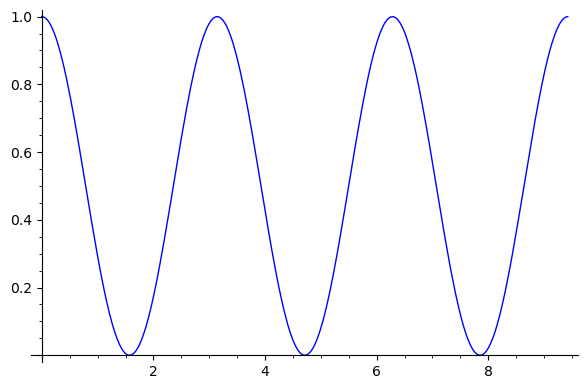

In [68]:
# Plots real part of U(t) for matrix DC4 from time 0 to 3pi at entry [0][0]
plot(transfer_at_time_r(DC4,x,0,0),0,3*np.pi)

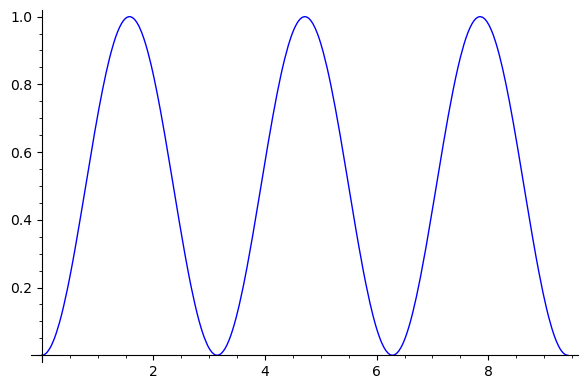

In [69]:
# Plots real part of U(t) for matrix DC4 from time 0 to 3pi at entry [2][0]
plot(transfer_at_time_r(DC4,x,2,0),0,3*np.pi)